<a href="https://colab.research.google.com/github/Jaswanth-gudiseva/student-dataset-visualization/blob/main/Student_Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

In [207]:
#Data Cleaning

data = pd.read_csv('/content/grade_pred_tidy.csv')
data.drop(107, axis = 0, inplace= True)
data.index = range(0,378)
data.study_time.fillna(value = 'Everyday upto 0-2 hours' , inplace = True)
data.time_outside.fillna(value = 0 , inplace = True)
data.fillna(value = 'None', inplace = True)
data['attendance'] = data.attendance.str.replace('?','%')
data['intra_hostel'] = data.intra_hostel.str.replace('Manthan', '2' )
data['intra_hostel'] = data.intra_hostel.str.replace('Irregular', '2' )
data['intra_hostel'] = data.intra_hostel.str.replace('Two hours', '2' )
data['intra_hostel'] = data.intra_hostel.str.replace('Depends. Before day of event almost entire night', '5' )
data['intra_hostel'] = data.intra_hostel.str.replace('0.05', '0' )
data['intra_hostel'] = data.intra_hostel.str.replace('None', '0' )
data['intra_hostel'] = data.intra_hostel.str.replace('no', '0' )
data['intra_hostel'] = data.intra_hostel.str.replace('No', '0' )
data['intra_hostel'] = data.intra_hostel.str.replace('O', '0' )

a = -1
for i in data.intra_hostel:
  a += 1
  x = ''
  for y in i:
    if not(y.isalpha()):
      x = x + y
  data.loc[a, 'intra_hostel'] = x
a1 = -1
for i1 in data.intra_hostel:
  a1 += 1
  if len(i1) > 2:
    if i1[1] == '-':
      k = round(((int(i1[0])+int(i1[2]))/2), 1)
      data.loc[a1, 'intra_hostel'] = str(k)
data['intra_hostel'] = data.intra_hostel.str.replace('2 -3', '2.5' )
data['intra_hostel'] = data.intra_hostel.str.replace('-', '0' )
data['intra_hostel'] = data.intra_hostel.str.replace('3:30', '3.5' )
data['intra_hostel'] = data.intra_hostel.str.replace('1  2', '1.5' )
data['intra_hostel'] = data.intra_hostel.str.replace('1/2', '0.5' )
data['intra_hostel'] = data.intra_hostel.str.replace('6  7', '6.5' )
data['intra_hostel'] = data.intra_hostel.str.replace('2  3', '2.5' )
data['intra_hostel'] = data.intra_hostel.str.replace('2/3/4', '3' )
data['intra_hostel'] = data.intra_hostel.str.replace('5  6', '5.5' )
data['intra_hostel'] = data.intra_hostel.str.replace(' ', '' )
data['intra_hostel'] = data.intra_hostel.str.replace('40', '1' )
data.loc[315, 'intra_hostel']  = '24'
data['intra_hostel'] = data.intra_hostel.str.replace('24', '10' )
data['intra_hostel'] = data.intra_hostel.astype(float)
drop_cols = ['Unnamed: 0']
data = data.drop(drop_cols, axis = 1)
data = data.drop_duplicates(keep = 'first')
data.drop(246, axis = 0, inplace= True)
data.index = range(1,374)
data['hostel'] = data.hostel.str.replace('DIhing', 'Dihing')
data['home_city'] = data.home_city.str.replace(' ', '')
data['tv_time'] = data.tv_time.astype(int)
data['sleep_time'] = data.sleep_time.str.replace('1 am','After 12 am')
data['sleep_time'] = data.sleep_time.str.replace('Around 12','After 12 am')
data['sleep_time'] = data.sleep_time.str.replace('Around 1','After 12 am')
data['sleep_time'] = data.sleep_time.str.replace('Between 12 and 2','After 12 am')
data['sleep_time'] = data.sleep_time.str.replace('6:30 am','After 2 am')
data['sleep_time'] = data.sleep_time.str.replace('3','After 2 am')

In [208]:
indexes = []
for ind in data.branch.value_counts().index.sort_values():
  indexes.append(ind)

In [209]:
ls = []
for div in indexes:
  a = data[data.branch == div].cpi.mean()
  ls.append(a)

In [210]:
branch_cpi = pd.DataFrame(ls, indexes, columns = ['CPI'])
branch_cpi.index.name  = 'branch'
branch_cpi.reset_index(inplace= True)
branch_cpi.sort_values('CPI', ascending = False, inplace = True)
branch_cpi

,branch,CPI
3,CSE,8.492174
8,MC,8.329643
6,ECE/EEE,8.067500
9,ME,7.816286
5,Design,7.722857
2,CL,7.553019
7,EP,7.353929
4,CST,7.348966
0,BSBE,7.131081
1,CE,6.915244


In [211]:
data[data.branch == 'CE'].cpi.max()

9.23

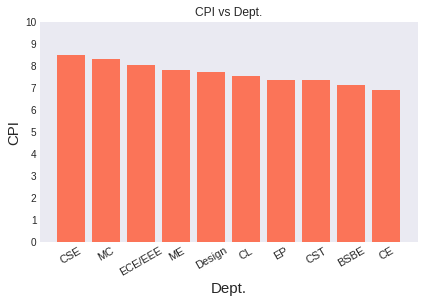

In [212]:
import matplotlib.font_manager
style.use('seaborn-dark')
fig = plt.bar(branch_cpi.branch, branch_cpi.CPI, color = '#fb7458')
plt.title('CPI vs Dept.')
plt.xlabel('Dept.', fontsize = 15)
plt.ylabel('CPI', fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.tight_layout()
plt.xticks(indexes, fontsize = 11, fontname = 'sans-serif', rotation = 30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


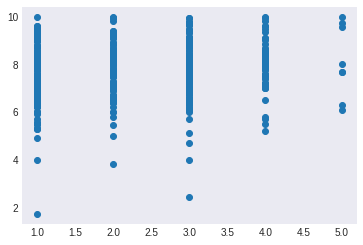

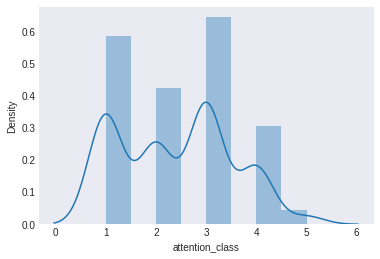

In [213]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# plt.scatter(data.drop(data[data.intra_hostel == 18].head(1).index, axis = 0).intra_hostel ,data.drop(data[data.intra_hostel == 18].head(1).index, axis = 0).cpi)
plt.scatter(data.attention_class, data.cpi)
plt.figure(figsize=(6,4))
plt.tight_layout()
seabornInstance.distplot(data['attention_class'])
plt.show()

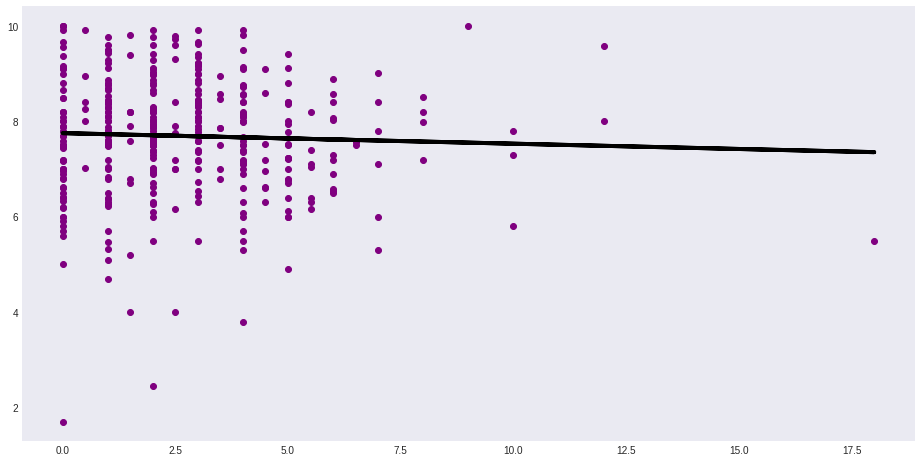

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6201
Date:                Tue, 20 Jul 2021   Prob (F-statistic):              0.432
Time:                        09:35:36   Log-Likelihood:                -607.58
No. Observations:                 373   AIC:                             1219.
Df Residuals:                     371   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7549      0.099     78.681      0.0

In [214]:
import statsmodels.api as sm

X = data['intra_hostel'].values.reshape(-1,1)
y = data['cpi'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['intra_hostel'],
    data['cpi'],
    c='purple'
)
plt.plot(
    data['intra_hostel'],
    predictions,
    c='black',
    linewidth=4
)
# plt.xlabel("Money spent on TV ads ($)")
# plt.ylabel("Sales ($)")
plt.show()
# X = data['intra']
# y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


In [215]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(data.cpi, predictions))

print(rmse)

1.2336216839535048


In [216]:
from scipy import stats
stats.pearsonr(data.tv_time, data.cpi)

(-0.16302494377981935, 0.0015824257816724353)

In [217]:
data.attendance.value_counts()

Below 90%    209
Above 90%    139
Below 75%     25
Name: attendance, dtype: int64

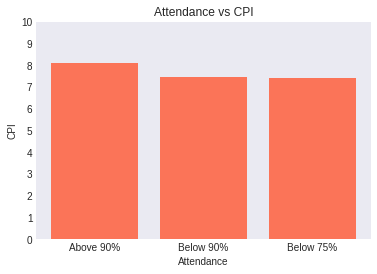

,0
8.109619,Above 90%
7.452225,Below 90%
7.432400,Below 75%


In [218]:
attendance_range = ['Above 90%', 'Below 90%', 'Below 75%']
attendance_cpi_mean = []
for attendance_value in attendance_range:
  attendance_cpi_mean.append(data[data.attendance == attendance_value].cpi.mean())
plt.bar(attendance_range, attendance_cpi_mean, color = '#fb7458')
plt.xlabel('Attendance')
plt.ylabel('CPI')
plt.title('Attendance vs CPI')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.show()
pd.DataFrame(attendance_range, attendance_cpi_mean)

In [219]:
cult = [value for value in data.cult_clubs.value_counts().head(8).index]
cult.append('Octaves')

In [220]:
arr = []
for car in data.cult_clubs:
  arr.append(car)
arr.append('Octaves')
arr1 = []
for a in arr:
  arr1.append(data[data.cult_clubs == a].cpi)

In [221]:
arr = []
for an in cult:
  arr.append(data[data.cult_clubs.str.contains(an)].cpi.mean())
show_pd = pd.DataFrame(aj, cult)
show_pd.columns = ['CPI']
show_pd.sort_values('CPI', ascending = False, inplace = True)
show_pd

,CPI
Debsoc,8.513913
AnR,7.937857
Lumiere,7.655000
Drama club,7.653478
Fine-Arts,7.646667
None,7.641012
Cadence,7.581600
Montage,7.521111
Octaves,7.397778


Text(0.5, 1.0, 'Cultural Clubs vs CPI')

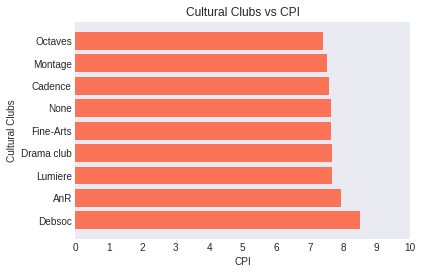

In [224]:
plt.barh(show_pd.index, show_pd.CPI, color = '#fb7458' )
plt.xlabel('CPI')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Cultural Clubs')
plt.title('Cultural Clubs vs CPI')

,CPI
Automobile Club,8.20
EDC,9.23
Aero,9.74
Quiz,9.77
Robotics,9.81
FEC,9.93
Coding Club,9.93
Electronics,9.93
CnA,9.93
None,10.00


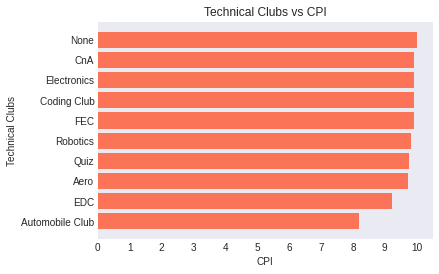

In [225]:
tech = ['None', 'FEC', 'Aero', 'Coding Club', 'Robotics', 'Electronics', 'CnA', 'Automobile Club', 'Quiz', 'EDC' ]
arr = []
for a in tech:
  arr.append(data[data.tech_clubs.str.contains(a)].cpi.max())
show_pd = pd.DataFrame(arr, tech)
show_pd.columns = ['CPI']
show_pd.sort_values('CPI', ascending = True, inplace = True)
plt.barh(ks.index, ks.CPI, color = '#fb7458' )
plt.xlabel('CPI')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Technical Clubs')
plt.title('Technical Clubs vs CPI')
show_pd

In [226]:
data.fest.value_counts()

None                        115
Alcher                       88
Techniche                    64
Techniche, Alcher            52
Udgam                        13
Other                        10
Techniche, Udgam             10
Techniche, Alcher, Udgam      8
Alcher, Other                 4
Techniche, Alcher, Other      4
Alcher, Udgam                 3
Udgam, Other                  1
Techniche, Other              1
Name: fest, dtype: int64

,CPI
Kameng,8.279091
Dihing,8.120000
Manas,7.947000
Umiam,7.824400
Brahmaputra,7.712931
Dhansiri,7.694255
Lohit,7.691000
Siang,7.677375
Kapili,7.512000
Barak,7.469388


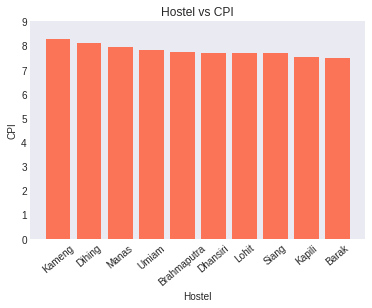

In [227]:
arr = []
for hostel in data.hostel.value_counts().index:
  arr.append(data[data.hostel.str.contains(hostel)].cpi.mean())
show_pd = pd.DataFrame(arr, data.hostel.value_counts().index)
show_pd.columns = ['CPI']
show_pd.sort_values('CPI', ascending = False, inplace = True)
plt.bar(show_pd.index, show_pd.CPI, color = '#fb7458' )
plt.yticks([0,1,2,3,4,5,6,7,8,9]) 
plt.xticks(rotation = 40)
plt.xlabel('Hostel')
plt.ylabel('CPI')
plt.title('Hostel vs CPI')
show_pd

,CPI
Other,7.297350
None,7.616087
Alcher,7.642453
Techniche,7.828669
Udgam,7.898857


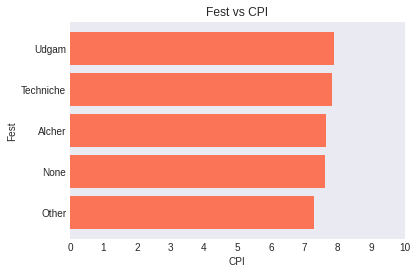

In [228]:
fest = ['Alcher', 'Techniche', 'Udgam', 'Other', 'None']
arr = []
for ansa in fest:
  arr.append(data[data.fest.str.contains(ansa)].cpi.mean())
show_pd = pd.DataFrame(arr, fest)
show_pd.columns = ['CPI']
show_pd.sort_values('CPI', ascending = True, inplace = True)
plt.barh(show_pd.index, show_pd.CPI, color = '#fb7458' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('CPI')
plt.ylabel('Fest')
plt.title('Fest vs CPI')
show_pd

In [229]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
# data.tech_clubs.value_counts()

In [230]:
data.intra_hostel.value_counts().values

array([64, 58, 58, 48, 39, 24, 12, 11, 11,  8,  8,  7,  6,  6,  4,  3,  2,
        2,  1,  1])

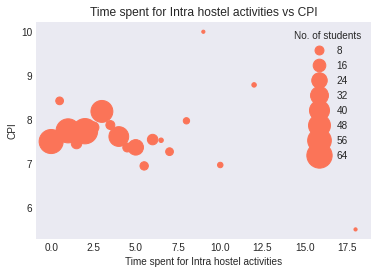

In [231]:
# sns.lmplot('intra_hostel', 'cpi', data=data, hue = None, palette = ['#fb7458'], )
scatter = plt.scatter(data.intra_hostel.value_counts().index, [data[data.intra_hostel == jl].cpi.mean() for jl in data.intra_hostel.value_counts().index], s = [n*10 for n in data.intra_hostel.value_counts().values], color = '#fb7458' )
handles, labels = scatter.legend_elements(prop="sizes", alpha= 1, color = '#fb7458' )
plt.legend(handles, [8,16,24,32,40,48,56,64], loc="upper right", title="No. of students")
plt.xlabel('Time spent for Intra hostel activities')
plt.ylabel('CPI')
plt.title('Time spent for Intra hostel activities vs CPI')
# plt.legend(bbox_to_anchor = [1,1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time spent for Intra hostel activities vs CPI')

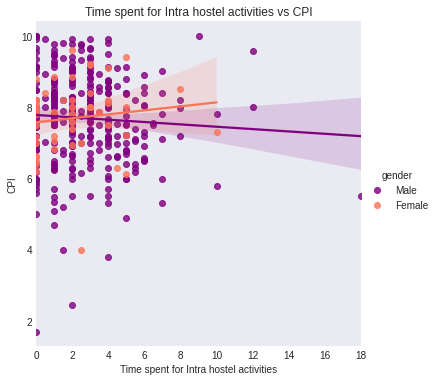

In [232]:
import seaborn as sns

sns.lmplot('intra_hostel', 'cpi', data=data, hue = 'gender', palette = ['purple', '#fb7458'])
plt.xlabel('Time spent for Intra hostel activities')
plt.ylabel('CPI')
plt.title('Time spent for Intra hostel activities vs CPI')

In [233]:
from scipy.stats import linregress
linregress(data.intra_hostel, data.cpi)
(-0.040847388674438566)**2

0.001668509161520652

In [234]:
stats.pearsonr(data.intra_hostel, data.cpi)

(-0.040847388674438524, 0.4315309260923555)

In [235]:
stats.pearsonr(data[data.gender == 'Male'].intra_hostel, data[data.gender == 'Male'].cpi)

(-0.05962926588725324, 0.28456035606255736)

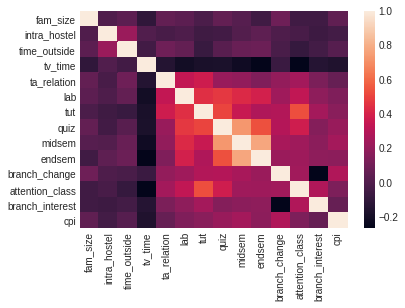

In [236]:
sns.heatmap(data.corr())

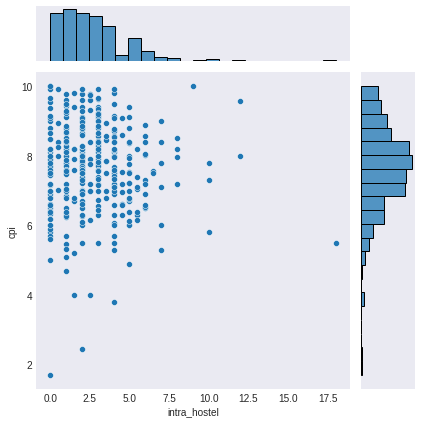

In [237]:
sns.jointplot(x='intra_hostel', y='cpi', data=data)


In [238]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,fam_size,intra_hostel,time_outside,tv_time,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,branch_interest,cpi
1,9,6.5,12.0,2,4,4.0,3.0,5.0,5.0,5.0,2.0,1.0,3.0,7.56
2,6,5.5,4.0,1,4,4.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,7.40
3,4,3.0,2.0,1,4,4.0,3.0,5.0,5.0,5.0,2.0,4.0,4.0,7.20
4,5,1.0,3.0,1,5,5.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,7.70
5,4,3.0,8.0,2,3,4.0,4.0,3.0,4.0,5.0,4.0,2.0,2.0,9.19


In [239]:
df_num_corr = df_num.corr()['cpi'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with CPI:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with CPI:
branch_change      0.285149
midsem             0.248030
quiz               0.216345
endsem             0.182151
tut                0.168593
lab                0.142047
attention_class    0.133687
tv_time           -0.163025
Name: cpi, dtype: float64


In [283]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data['intra_hostel'].values.reshape(-1,1), data.cpi.values.reshape(-1,1))
# predi = reg.predict(data['intra_hostel'].values.reshape(-1,1))
# plt.plot(predi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

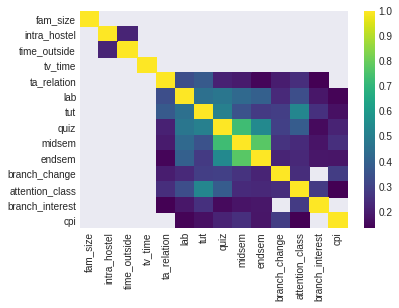

In [241]:
sns.heatmap(df_num.corr()[(df_num.corr() >= 0.1) | (df_num.corr() <= -0.4)], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.2851490664984514, 2.0770640508069174e-08)

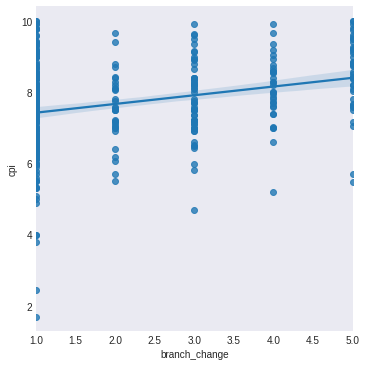

In [242]:
from scipy.stats import pearsonr

sns.lmplot('branch_change' , 'cpi', data = data)
pearsonr(data.branch_change , data.cpi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


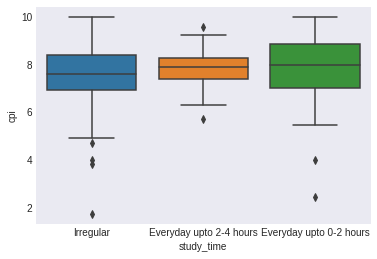

In [243]:
sns.boxplot('study_time', 'cpi', data = data)

In [244]:
data.study_time.value_counts()

Irregular                  242
Everyday upto 0-2 hours    104
Everyday upto 2-4 hours     27
Name: study_time, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


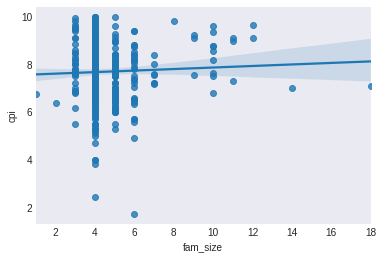

In [245]:
sns.regplot(data.fam_size, data.cpi)

In [246]:
data.head(1)

,gender,branch,dropper,tenth_board,twelvth_board,coaching,coaching_city,coaching_name,home_state,home_city,fam_size,mom_ed,dad_ed,mom_job,dad_job,study_time,tech_clubs,cult_clubs,fest,hostel,intra_hostel,ed_loan,time_outside,attendance,relationship,tv_time,library,sleep_time,sleep_duration,sleep_day,addiction,ta_relation,lab,tut,quiz,midsem,endsem,branch_change,attention_class,study_preference,material_preference,branch_interest,core,cpi
1,Male,BSBE,No,CBSE,CBSE,No,None,None,Rajasthan,Bikaner,9,Post Graduate,Post Graduate,Housewife,Business,Irregular,"CnA, Quiz club",Debsoc,Techniche,Umiam,6.5,No,12.0,Below 90%,Single,2,During Exams,After 12 am,7,No,None,4,4.0,3.0,5.0,5.0,5.0,2.0,1.0,Individual,Online content,3.0,Non-Core,7.56


In [247]:
data.addiction.value_counts()

None                       354
Drinking                     7
Weed                         5
Drinking, Smoking, Weed      4
Smoking                      2
Drinking, Smoking            1
Name: addiction, dtype: int64

In [248]:
data['sleep1'] = data.sleep_duration.str.replace('<=','').str.replace('>=','').astype(int)
stats.pearsonr(data.sleep1, data.cpi)

(0.06392452409329444, 0.21805969410559817)

<BarContainer object of 4 artists>

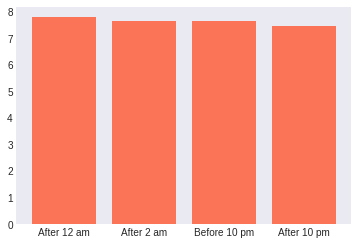

In [249]:
arr = []
for value in data.sleep_time.value_counts().index:
  arr.append(data[data.sleep_time.str.contains(value)].cpi.mean())
show_pd = pd.DataFrame(arr, data.sleep_time.value_counts().index)
show_pd.columns = ['CPI']
show_pd.sort_values('CPI', ascending = False, inplace = True)
plt.bar(show_pd.index, show_pd.CPI, color = '#fb7458' )

In [250]:
for value in ['ta_relation', 'lab', 'tut', 'quiz', 'midsem', 'endsem', 'branch_change', 'attention_class']:
  print(pearsonr(data[value] , data.cpi))

(0.06759853214038015, 0.19269323581101133)
(0.14204695496273456, 0.005993759609677569)
(0.16859295485720172, 0.0010809279202107114)
(0.21634499633889678, 2.5054684328472762e-05)
(0.24803037244242002, 1.2334930210592727e-06)
(0.18215092691918663, 0.0004066426158176012)
(0.2851490664984514, 2.0770640508069174e-08)
(0.13368743171433942, 0.00974128797367299)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sleep Time vs CPI')

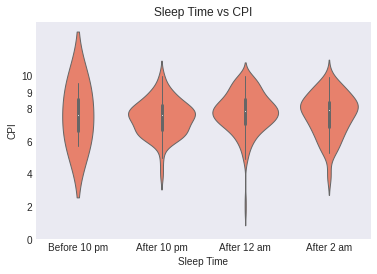

In [251]:
sns.violinplot(data.sleep_time, data.cpi, color = '#fb7458',linewidth = 1, order = ['Before 10 pm', 'After 10 pm', 'After 12 am', 'After 2 am'])
plt.xlabel('Sleep Time')
plt.ylabel('CPI')
plt.yticks([0,2,4,6,8,9,10])
plt.title('Sleep Time vs CPI')

Text(0.5, 1.0, 'Sleep Duration vs CPI')

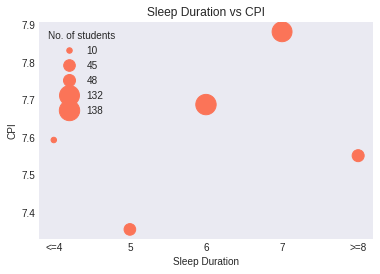

In [252]:
scatter = plt.scatter(data.sleep1.value_counts().index, [data[data.sleep1 == jl].cpi.mean() for jl in data.sleep1.value_counts().index], s = [n*3 for n in data.sleep1.value_counts().values], color = '#fb7458' )
handles, labels = scatter.legend_elements(prop="sizes", alpha= 1, color = '#fb7458' )
plt.legend(handles, [10,45,48,132,138], loc="upper left", title="No. of students")
plt.xlabel('Time spent for Intra hostel activities')
plt.xticks(ticks = [4,5,6,7,8], labels = ['<=4',5,6,7,'>=8'])
plt.xlabel('Sleep Duration')
plt.ylabel('CPI')
plt.title('Sleep Duration vs CPI')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


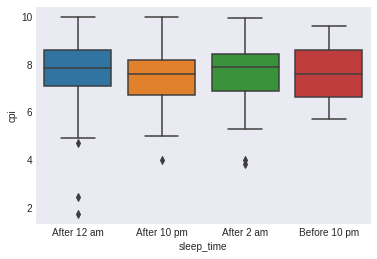

In [253]:
sns.boxplot(data.sleep_time, data.cpi)

7.8072511210762325


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


7.5303

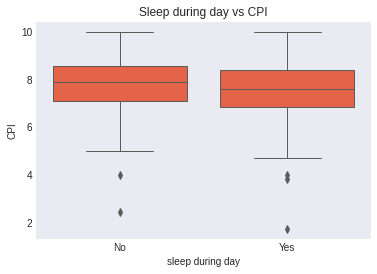

In [254]:
sns.boxplot(data.sleep_day,data.cpi, color = '#fe5330', linewidth =1 )
plt.xlabel('sleep during day')
plt.ylabel('CPI')
plt.title('Sleep during day vs CPI')
print(data[data.sleep_day == 'No'].cpi.mean())
data[data.sleep_day == 'Yes'].cpi.mean()

In [255]:
data[data.library == 'Often'].cpi.describe()

count    40.000000
mean      7.559250
std       0.838513
min       5.500000
25%       7.015000
50%       7.700000
75%       8.010000
max       9.600000
Name: cpi, dtype: float64

In [256]:
data[data.library == 'During Exams'].cpi.describe()

count    131.000000
mean       7.622061
std        1.345875
min        1.700000
25%        6.800000
50%        7.800000
75%        8.420000
max       10.000000
Name: cpi, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


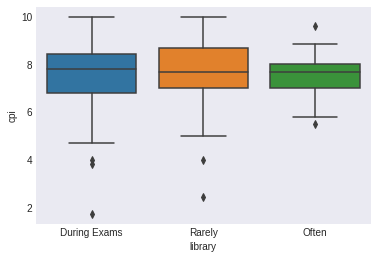

In [257]:
sns.boxplot(data.library, data.cpi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1.2290330112062442


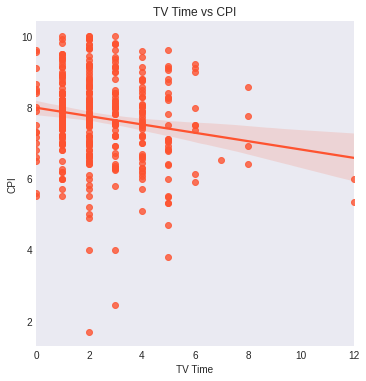

In [258]:
sns.lmplot('tv_time', 'cpi', data=data, line_kws={'color': '#fe5330'}, scatter_kws = {'color': '#fe5330'})
linregress(data.tv_time, data.cpi)
plt.xlabel('TV Time')
plt.ylabel('CPI')
plt.title('TV Time vs CPI')
X1 = data['tv_time'].values.reshape(-1,1)
prediction = reg.predict(X1)
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(data.cpi, prediction))

print(rmse)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship status vs CPI')

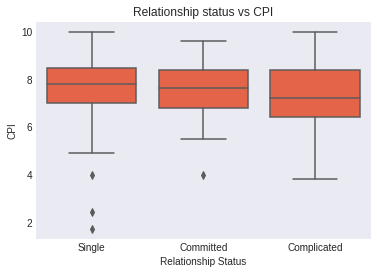

In [259]:
sns.boxplot(data.relationship, data.cpi, color = '#fe5330', order = ['Single', 'Committed', 'Complicated'])
plt.xlabel('Relationship Status')
plt.ylabel('CPI')
plt.title('Relationship status vs CPI')

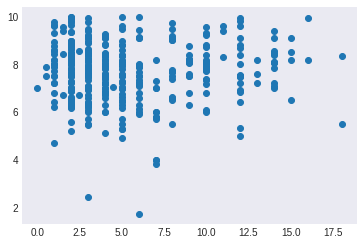

In [260]:
plt.scatter('time_outside', 'cpi', data = data)

Text(0.5, 1.0, 'Study Time vs CPI')

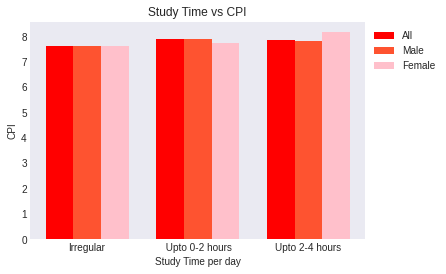

In [261]:
# sns.boxplot(data.study_time, data.cpi)
dar = pd.DataFrame([data[data.study_time == i].cpi.mean() for i in data.study_time.value_counts().index] , data.study_time.value_counts().index)
darmale = pd.DataFrame([data[(data.study_time == i) & (data.gender == 'Male')].cpi.mean() for i in data.study_time.value_counts().index] , data.study_time.value_counts().index)
darfemale = pd.DataFrame([data[(data.study_time == i) & (data.gender == 'Female')].cpi.mean() for i in data.study_time.value_counts().index] , data.study_time.value_counts().index)
length = np.arange(3)
width = 0.25
plt.bar(length - width, dar[0], width = width, color = 'red', label = 'All')
plt.bar(length, darmale[0], width = width, color = '#fe5330', label = 'Male')
plt.bar(length + width, darfemale[0], width = width, color = 'pink', label = 'Female')
plt.xticks(ticks = length, labels = ['Irregular', ' Upto 0-2 hours', 'Upto 2-4 hours'])
plt.xlabel('Study Time per day')
plt.legend()
plt.legend(bbox_to_anchor = [1,1])
plt.ylabel('CPI')
plt.title('Study Time vs CPI')

In [262]:
ls = []
ls.append(data[(data.fam_size == 1) | (data.fam_size == 2) |(data.fam_size == 3)].cpi.mean())
ls.append(data[(data.fam_size == 4) | (data.fam_size == 5) |(data.fam_size == 6)].cpi.mean())
ls.append(data[(data.fam_size == 7) | (data.fam_size == 8) |(data.fam_size == 9)].cpi.mean())
ls.append(data[(data.fam_size == 10) | (data.fam_size == 11) |(data.fam_size == 12)].cpi.mean())
ls

[8.01026315789474, 7.6098701298701314, 8.076818181818181, 8.527642857142856]

In [263]:
show_pd = pd.DataFrame([data[data.fam_size == i].cpi.mean() for i in data.fam_size.value_counts().index] , data.fam_size.value_counts().index)
show_pd.sort_values(by = 0)

,0
2,6.370000
1,6.770000
14,7.000000
18,7.100000
6,7.320333
5,7.440937
7,7.592143
4,7.700981
3,8.090278
10,8.355222


In [264]:
data[data.material_preference == 'Online content'].cpi.mean()

7.675287162162161

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Branch Interest vs CPI')

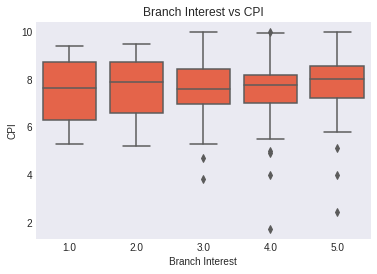

In [265]:
sns.boxplot(data.branch_interest, data.cpi, color = '#fe5330' )
plt.xlabel('Branch Interest')
plt.ylabel('CPI')
plt.title('Branch Interest vs CPI')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


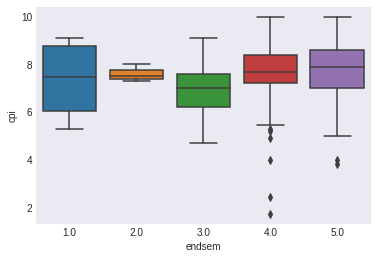

In [266]:
sns.boxplot(data.endsem, data.cpi)

In [267]:
data[data.tenth_board == 'ICSE'].cpi.describe()

count    30.000000
mean      8.033900
std       1.190102
min       6.200000
25%       7.050000
50%       7.865000
75%       9.100000
max      10.000000
Name: cpi, dtype: float64

In [268]:
data[data.tenth_board == 'CBSE'].cpi.describe()

count    256.000000
mean       7.768965
std        1.211683
min        1.700000
25%        7.200000
50%        7.820000
75%        8.502500
max       10.000000
Name: cpi, dtype: float64

Text(0.5, 1.0, 'Gender vs CPI')

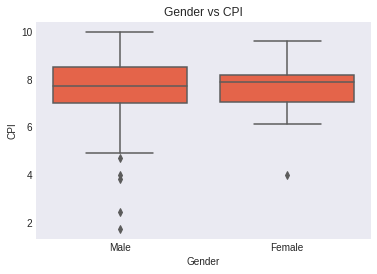

In [269]:
sns.boxplot( x = data.gender, y = data.cpi, color = '#fe5330', linewidth = 1.5)
style.use('seaborn-dark')
plt.xlabel('Gender')
plt.ylabel('CPI')
plt.title('Gender vs CPI')

([<matplotlib.axis.YTick at 0x7f86c327fed0>,
 <a list of 11 Text major ticklabel objects>)

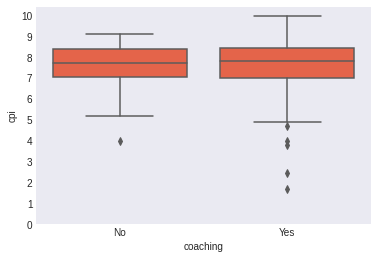

In [270]:
sns.boxplot( x = data.coaching, y = data.cpi, color = '#fe5330', linewidth = 1.5)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])

In [271]:
data[data.tenth_board == 'CBSE'].cpi.max()

10.0

Text(0.5, 1.0, 'Tenth Board vs CPI')

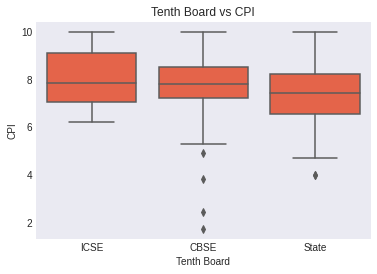

In [272]:
sns.boxplot( x = data.tenth_board, y = data.cpi, color = '#fe5330', linewidth = 1.5, order = ['ICSE', 'CBSE', 'State'])
plt.xlabel('Tenth Board')
plt.ylabel('CPI')
plt.title('Tenth Board vs CPI')

Text(0.5, 1.0, 'Tweltfh Board vs CPI')

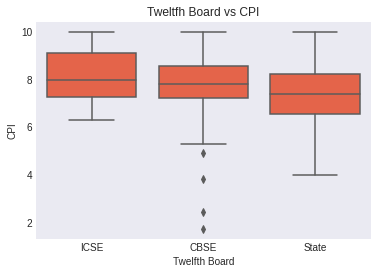

In [273]:
sns.boxplot( x = data[data.gender == 'Male'].tenth_board, y = data[data.gender == 'Male'].cpi, color = '#fe5330', linewidth = 1.5, order = ['ICSE', 'CBSE', 'State'])
plt.xlabel('Twelfth Board')
plt.ylabel('CPI')
plt.title('Tweltfh Board vs CPI')

In [274]:
data.mom_job.value_counts()

Housewife               245
Govt                     53
Else                     28
Medical                  18
Business                 14
Technical                 7
Management & Finance      5
Artist                    2
Law                       1
Name: mom_job, dtype: int64

In [275]:
pd.DataFrame([data[data.mom_job == i].cpi.mean() for i in data.mom_job.value_counts().index] , data.mom_job.value_counts().index)

,0
Housewife,7.641192
Govt,7.666226
Else,7.781429
Medical,7.936667
Business,7.877143
Technical,7.682857
Management & Finance,8.454000
Artist,8.345000
Law,8.400000


In [276]:
data.dad_job.value_counts()


Govt                    132
Business                 95
Else                     57
Technical                37
Management & Finance     28
Medical                  21
Law                       2
Artist                    1
Name: dad_job, dtype: int64

In [277]:
show_pd = pd.DataFrame([data[data.dad_ed == i].cpi.mean() for i in ['Post Graduate', 'Graduate', '12th Pass', '10th Pass', '< 10th Pass']] , ['Post Graduate', 'Graduate', '12th Pass', '10th Pass', '<10th Pass'])
show_pd


,0
Post Graduate,7.912411
Graduate,7.648562
12th Pass,7.526711
10th Pass,7.673529
<10th Pass,6.625333


In [278]:
show_pd = pd.DataFrame([data[data.mom_ed == i].cpi.mean() for i in data.mom_ed.value_counts().index] , data.mom_ed.value_counts().index)
show_pd

,0
Graduate,7.634667
Post Graduate,8.046066
12th Pass,7.564468
10th Pass,7.459912
<10th Pass,7.049853
None,9.400000


Text(0.5, 1.0, "Parent's education vs CPI")

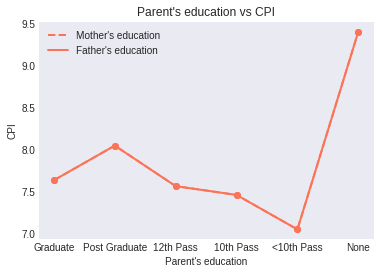

In [279]:
plt.plot(bun.index, bun[0], linewidth = 2, color = '#fb7458', linestyle = '--', label = 'Mother\'s education')
plt.plot(bun.index, bun[0], linewidth = 2, color = '#fb7458', label = 'Father\'s education' )
plt.scatter(bun.index, bun[0], color = '#fb7458')
plt.scatter(bun.index, bun[0], color = '#fb7458' )
plt.legend()
plt.xlabel('Parent\'s education')
plt.ylabel('CPI')
plt.title('Parent\'s education vs CPI')

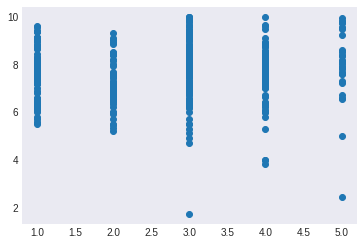

In [280]:
plt.scatter(data.ta_relation, data.cpi)

In [281]:
[data[data.dropper == i].cpi.mean() for i in data.dropper.value_counts().index]

[7.883385496183202, 7.253288288288289]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


10.0

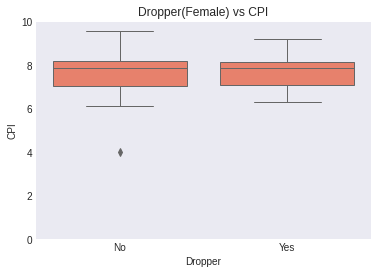

In [282]:
style.use('seaborn-dark')

sns.boxplot(data[data.gender == 'Female'].dropper, data.cpi, color = '#fb7458', linewidth = 1 )
plt.xlabel('Dropper')
plt.ylabel('CPI')
plt.title('Dropper(Female) vs CPI')
plt.yticks([0,2,4,6,8,10])
data[data.dropper == 'No'].cpi.max()